<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [2]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")

In [3]:
with open('data/login_data.txt') as f: # данные для подключение к базе сохраним в отделом файле
    for line in f:
        exec(line)

In [4]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [5]:
# текст запроса
query_3_1 = f'''select count(*) 
            from public.vacancies 
            '''
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''select count(*) 
            from public.employers
            ''' 
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df          

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [7]:
# текст запроса
query_3_3 = f'''select count(id) 
            from public.areas
            ''' 
# результат запроса
pd.read_sql_query(query_3_3, connection)

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [8]:
# текст запроса
query_3_4 = f'''select count(distinct name) 
            from public.industries
            ''' 
# результат запроса
pd.read_sql_query(query_3_4, connection)

,count
0,294


***

##### Выводы по предварительному анализу данных

В базе сайта в определеный момент времени находилось около 50 тыс. вакансий размещенны в общей сложности более 23 тыс. работодателей. География вакансий представлена более тысячей регионов и/или населенных пунктов. Большая дифференциация наблюдается по сферам деятельности вакансий - около 300 наименований.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [9]:
# текст запроса
o = 2
query_4_1 = f'''select  aa."name" area,
		count(vv.id) cnt
		from public.vacancies vv
		join public.areas aa ON aa.id = vv.area_id
		group by aa.id
		order by {o} desc
		''' 
# результат запроса
df_vac = pd.read_sql_query(query_4_1, connection)
df_vac.head()

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [10]:
# текст запроса
query_4_2 = f'''select  count(*)
            from public.vacancies
            where (salary_from is not NULL) or (salary_to is not NULL)
            ''' 
# результат запроса
pd.read_sql_query(query_4_2, connection)

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [11]:
# текст запроса
query_4_3 = f'''select  'нижняя граница' avarage_salary,
		        round(AVG(salary_from)) salary
                from public.vacancies
                union
                select  'потолок' avarage_salary,
		        round(AVG(salary_to)) salary
                from public.vacancies
                ''' 
# результат запроса
pd.read_sql_query(query_4_3, connection)

,avarage_salary,salary
0,нижняя граница,71065.0
1,потолок,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [12]:
# текст запроса
o = 3
query_4_4 = f'''select  schedule,
		        employment,
		        count(*)
                from public.vacancies
                group by 1,2
                order by {o} desc
                ''' 
# результат запроса
df_day = pd.read_sql_query(query_4_4, connection)
df_day.head()

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [13]:
# текст запроса
g = 1
o = 2
query_4_5 = f'''select  experience,
		        count(*)
                from public.vacancies
                group by {g}
                order by {o}
                ''' 
# результат запроса
df_opt = pd.read_sql_query(query_4_5, connection)
df_opt

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

##### Выводы по детальному анализу вакансий


Text(0, 0.5, 'Регионы/Города')

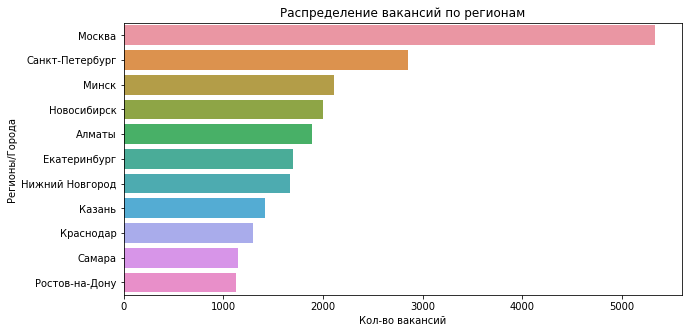

In [14]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_vac.loc[:10], x='cnt', y='area')
plt.title('Распределение вакансий по регионам');
axes.set_xlabel('Кол-во вакансий')
axes.set_ylabel('Регионы/Города')


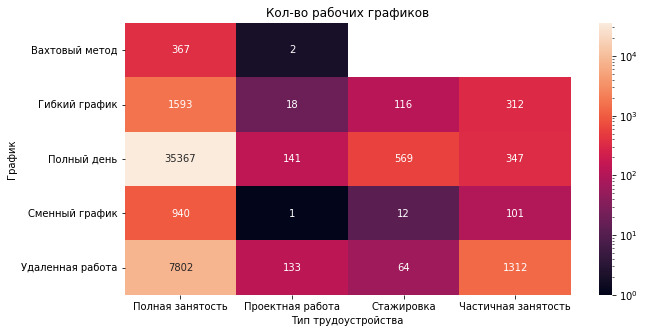

In [15]:
from matplotlib.colors import LogNorm, Normalize
fig, axes = plt.subplots(figsize=(10, 5))
pivot = df_day.pivot_table(values='count',index='schedule', columns='employment')
sns.heatmap(pivot, annot=True, norm=LogNorm(), fmt='g')
axes.set_xlabel('Тип трудоустройства')
axes.set_ylabel('График')
plt.title('Кол-во рабочих графиков');

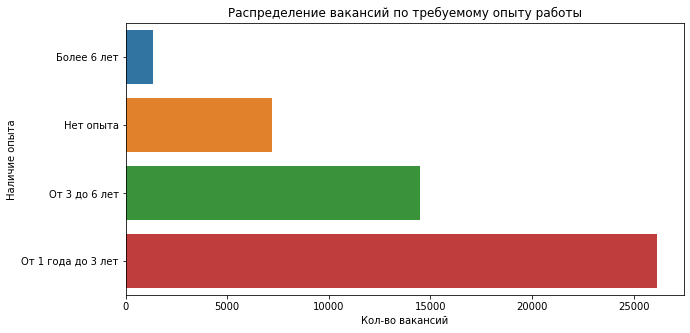

In [16]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_opt, x='count', y='experience')
plt.title('Распределение вакансий по требуемому опыту работы')
axes.set_xlabel('Кол-во вакансий')
axes.set_ylabel('Наличие опыта');

Как можно было предположить самое большое количество вакансий расположены в крупных мегаполисах - Москва и Санкт-Петербург. Между тем на сайте прелставлены и работодатели из стран СНГ о чем свидетельствуют попавшие в том Минск и Алматы. В среднем же нижняя граница зарплат начинается от 70 тыс. руб и доходит до верхней границы равной 110 тыс. рублей. Большая часть вакансий рассчитана на начинающего специалиста и требует от сосискателе наличия опыта работы от 1 до 3 лет.

Большая часть вакансий предполагает полный день и полную занятость. На втором месте по популярности -  полная занятость при условии удаленной работы. 

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [17]:
# текст запроса
query_5_1 = f'''(select ee."name" employer_name,
	            count(*) vacancies_number
                from public.vacancies vv
                left join public.employers ee ON ee.id = vv.employer_id
                group by ee.id
                order by 2 desc
                limit 1)
                union
                (select ee."name",
	            count(*)
                from public.vacancies vv
                left join public.employers ee ON ee.id = vv.employer_id
                group by ee.id
                order by 2 desc
                offset 4
                limit 1)
                order by 2 desc
                '''
# результат запроса
df_comp = pd.read_sql_query(query_5_1, connection)
df_comp.head()

,employer_name,vacancies_number
0,Яндекс,1933
1,Газпром нефть,331


In [18]:
query_5_1_ = '''select count(*), employers.name
            from vacancies left join employers on vacancies.employer_id = employers.id
            group by employers.id
            order by count desc       
         '''
df_comp = pd.read_sql_query(query_5_1_,connection)

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [19]:
# текст запроса
query_5_2 = '''select areas.name as region, count(vacancies.id) as N_vacancies, count( distinct employers.id) as N_employers
            from areas left join vacancies on vacancies.area_id = areas.id
               left join employers on employers.area = areas.id
            group by areas.id
            having count(vacancies.id) = 0
            order by n_employers desc
            limit 1          
         '''
# результат запроса
pd.read_sql_query(query_5_2, connection)

,region,n_vacancies,n_employers
0,Россия,0,410


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [20]:
# текст запроса
query_5_3 = f'''select  ee."name",
		    count(distinct vv.area_id)
            from public.vacancies vv
            left join public.employers ee ON ee.id = vv.employer_id
            group by ee."name"
            order by 2 desc            
                '''
# результат запроса
df_area = pd.read_sql_query(query_5_3, connection)
df_area.head()

,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [21]:
# текст запроса
query_5_4 = f'''select  
                count(*)
                from public.employers ee
                left join public.employers_industries ei ON ei.employer_id = ee.id 
                where ei.industry_id is null
                '''
# результат запроса
pd.read_sql_query(query_5_4, connection)

,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [22]:
# текст запроса
query_5_5 = f'''select  ee."name",
                count(ei.industry_id)
                from public.employers ee
                left join public.employers_industries ei ON ei.employer_id = ee.id 
                group by ee."name"
                having count(ei.industry_id) = 4
                order by ee."name"
                offset 2
                limit 1
                '''
# результат запроса
pd.read_sql_query(query_5_5, connection)

,name,count
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [23]:
# текст запроса
query_5_6 = f'''select count(*)
                from public.employers_industries ee
                join public.industries ii on ii.id = ee.industry_id
                where ii."name" = 'Разработка программного обеспечения'
                '''
# результат запроса
pd.read_sql_query(query_5_6, connection)

,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [24]:
# код для получения списка городов-миллионников
import requests
from bs4 import BeautifulSoup
url ='https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', class_= "standard sortable")

df = pd.read_html(str(table))
df = pd.concat(df)
million_cities  = df['Город'].str.split('[', expand=True)[0].tolist()
million_cities

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Красноярск',
 'Челябинск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград']

In [25]:
# текст запроса
query_5_7 = f'''(select 
                areas.name as name,
                count (*) as number
            from 
                vacancies
            join areas ON vacancies.area_id = areas.id
            join employers ON employers.id  = vacancies.employer_id
            where employers.name LIKE 'Яндекс'
            and areas.name in ('Москва',  'Санкт-Петербург',  'Новосибирск',
                                'Екатеринбург',  'Казань',  'Нижний Новгород',
                                'Челябинск',  'Красноярск',
                                'Самара',  'Уфа',  'Ростов-на-Дону',
                                'Омск',  'Краснодар',  'Воронеж',
                                'Пермь',  'Волгоград')
            group by  areas.name  )
            
            union
            
            (select 
                'total',
                count(*) as number
            from 
                vacancies
            join areas ON vacancies.area_id = areas.id
            join employers ON employers.id  = vacancies.employer_id
            where employers.name LIKE 'Яндекс'
            and areas.name in ('Москва',  'Санкт-Петербург',  'Новосибирск',
                                'Екатеринбург',  'Казань',  'Нижний Новгород',
                                'Челябинск',  'Красноярск',
                                'Самара',  'Уфа',  'Ростов-на-Дону',
                                'Омск',  'Краснодар',  'Воронеж',
                                'Пермь',  'Волгоград'))
                                
            order by number
            

'''
pd.read_sql_query(query_5_7, connection)

,name,number
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


##### Выводы по детальному анализу работодателей

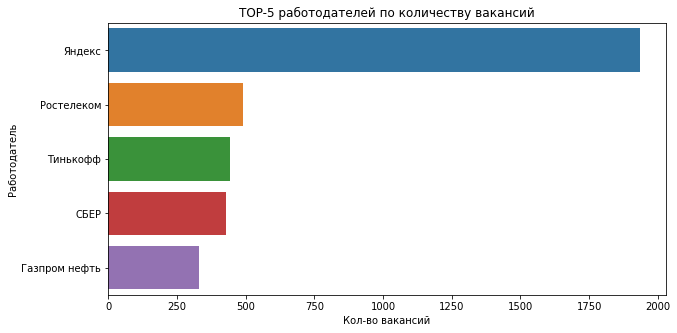

In [26]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_comp[:5], x='count',y='name')
plt.title('TOP-5 работодателей по количеству вакансий')
axes.set_xlabel('Кол-во вакансий')
axes.set_ylabel('Работодатель');

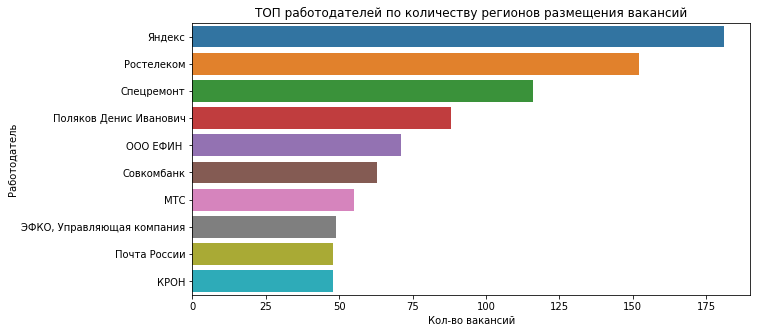

In [27]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_area.loc[:9], x='count',y='name')
plt.title('ТОП работодателей по количеству регионов размещения вакансий')
axes.set_xlabel('Кол-во вакансий')
axes.set_ylabel('Работодатель');

По количеству размещенных вакансий лидирует компания Яндекс. Яндекс так же является чемпионом списка и по охвату регионов своими вакансиями. На остальных позициях особенно по количеству вакансий разместились широко известные компании,бизнес процесс которых так или иначе тесно связаны со сферой IT.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [28]:
# текст запроса
query_6_1 = f'''select count(*)
                from public.vacancies vv
                where (vv."name" ilike '%data%' or vv."name" ILIKE '%данн%')
                '''
# результат запроса
pd.read_sql_query(query_6_1, connection)

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [29]:
# текст запроса
query_6_2 = '''select name, experience, employment
            from vacancies
            where (LOWER(name) like '%data scientist%' OR LOWER(name) like '%data science%' 
                OR  LOWER(name) like '%исследователь данных%' 
                OR (name like '%ML%' AND  name not like '%HTML%') 
                OR LOWER(name) like '%machine learning%' 
                OR LOWER(name) like '%машинн%обучен%')
                AND ( LOWER(name) like '%junior%' OR experience = 'Нет опыта' OR employment = 'Стажировка')
                
         '''
# результат запроса
df_jun = pd.read_sql_query(query_6_2, connection)
display(df_jun)
len(df_jun)

,name,experience,employment
0,Junior+ CV/ML developer,От 1 года до 3 лет,Полная занятость
1,Data Scientist (Junior+),От 1 года до 3 лет,Полная занятость
2,Junior Data Scientist (Стажер),Нет опыта,Стажировка
3,"Математик, Junior/Middle/Senior Data Scientist",От 1 года до 3 лет,Частичная занятость
4,Junior Data Scientist,Нет опыта,Полная занятость
5,Data Scientist/Machine Learning Engineer (Deve...,Нет опыта,Частичная занятость
6,Data Scientist (Junior),Нет опыта,Частичная занятость
7,Intern/Junior Data Scientist,Нет опыта,Стажировка
8,Junior Data Scientist (VK),От 1 года до 3 лет,Полная занятость
9,Junior/Middle Data Scientist,От 1 года до 3 лет,Полная занятость


51

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [31]:
# результат запроса

query_6_3 = '''select count(*)
            from vacancies
            where (LOWER(name) like '%data scientist%' OR LOWER(name) like '%data science%' 
                OR  LOWER(name) like '%исследователь данных%' 
                OR (name like '%ML%' AND  name not like '%HTML%')
                OR LOWER(name) like '%machine learning%' 
                OR LOWER(name) like '%машинн%обучен%')
                AND (UPPER(key_skills) like '%SQL%' OR LOWER(key_skills) like '%postgres%')
                
         '''
# результат запроса
pd.read_sql_query(query_6_3, connection)

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [32]:
# текст запроса
# текст запроса
query_6_4 = '''select count(*)
            from vacancies
            where (LOWER(name) like '%data scientist%' OR LOWER(name) like '%data science%' 
                OR  LOWER(name) like '%исследователь данных%' 
                OR (name like '%ML%' AND  name not like '%HTML%')
                OR LOWER(name) like '%machine learning%' 
                OR LOWER(name) like '%машинн%обучен%')
                AND (LOWER(key_skills) like '%python%')
                
         '''
pd.read_sql_query(query_6_4, connection)

,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [33]:
def skillcounter(x):
    if x is None:
        return 0
    else:
        return x.count('\t')+1

# текст запроса
query_6_5 = '''select  key_skills
            from vacancies
            where (LOWER(name) like '%data scientist%' OR LOWER(name) like '%data science%' 
                OR  LOWER(name) like '%исследователь данных%' 
                OR (name like '%ML%' AND  name not like '%HTML%')
                OR LOWER(name) like '%machine learning%' 
                OR LOWER(name) like '%машинн%обучен%')'''
                
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
df_6_5['n_skills'] = df_6_5['key_skills'].apply(skillcounter)
display(df_6_5)
print('Среднее количество ключевых навыков: ', round(df_6_5['n_skills'].mean(),2))

,key_skills,n_skills
0,Python\tSQL\tРабота в команде\tOpenCV\tML,5
1,Oracle Pl/SQL\tБазы данных\tMachine Learning\t...,9
2,Python\tOpenCV\tTensorflow\tComputer Vision\tН...,8
3,Python\tFlask\tLinux\tAWS\tGit,5
4,Python\tSQL\tNLP\tScikit-learn\tMachine Learning,5
...,...,...
475,Python\tNumpy\tPyTorch\tPandas\tМатематический...,9
476,Python\tScikit-learn\tPandas\tGit\tNumpy,5
477,Qt\tООП\tC++\tMS Visual Studio\tРазработка ком...,6
478,SCALA\tSQL\tМатематический анализ\tСтатистичес...,7


Среднее количество ключевых навыков:  5.75


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [34]:
# текст запроса
query_6_6 = f'''select experience, AVG ((coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from))/2)  as mean
            from vacancies
            where (LOWER(name) like '%data scientist%' OR LOWER(name) like '%data science%' 
                OR  LOWER(name) like '%исследователь данных%' 
                OR (name like '%ML%' AND  name not like '%HTML%')
                OR LOWER(name) like '%machine learning%' 
                OR LOWER(name) like '%машинн%обучен%')
                AND (salary_from is not null OR salary_to is not null)
             group by experience
            '''
# результат запроса
df_mean = pd.read_sql_query(query_6_6, connection)
df_mean


,experience,mean
0,Нет опыта,74642.857143
1,От 1 года до 3 лет,139674.750000
2,От 3 до 6 лет,243114.666667


##### Выводы по предметному анализу

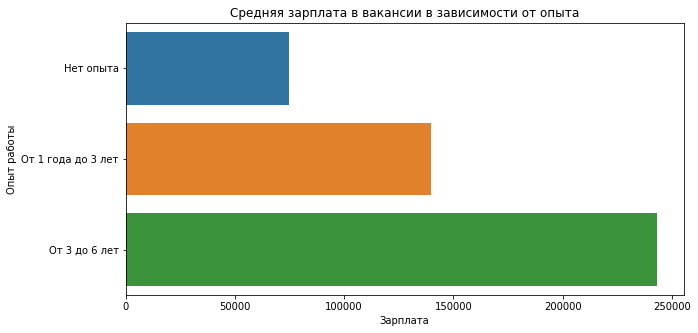

In [35]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.barplot(data = df_mean, x = 'mean', y = 'experience')
plt.title('Средняя зарплата в вакансии в зависимости от опыта')
axes.set_xlabel('Зарплата')
axes.set_ylabel('Опыт работы');

В базе более 17 сотен вакансия, которые имеют в своем название слово "данные".

С увеличением опыта средняя зарплата в Data Science  увеличивается в несколько раз: если без опыта работы кандидат  может  рассчитывать на зарплату в районе 75 тыс. рублей, то с опытом работы от двух лет он уже может претендовать на 150 тыс. руб. С опытом работы от трех лет предложения средняя зарплата уже больше 200 тыс. руб.

### Финал

In [36]:
# не забываем закрыть соединение после окончания работы
connection.close()

# Общий вывод по проекту

In [ ]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

Связка  Python и SQL состовляет отличную комбинацию для анализа данных.

На сайте HeadHunter в определенный момент времени собраны  около 50 тысяч вакансий от более 20 тысяч работодателей из 1362 населенных пунктов по 294 сферам деятельности. Проведен анализ распределение вакансий по работодателям, их географии, типам занятости и зарплатам.

Так же отдельно были  проанализированы вакансии в области анализа данных. Средняя зарплата junior специалистов не кажется высокой, однако по мере получения опыта зарплатыне ожидания увеличиваются в несколько раз.
